# Import essential libraries

In [39]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

In [49]:
#Reading the dataset
dataset = pd.read_csv('Netflix.csv')
dataset.head() #To show the first five rows of the dataset

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,14-Aug-20,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,23-Dec-16,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,20-Dec-18,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,16-Nov-17,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,1-Jan-20,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


# Data Cleaning

In [50]:
#To check for null values in the dataset

for i in dataset.columns:
    null_rate = dataset[i].isna().sum() / len(dataset) * 100 
    if null_rate > 0 :
        print("{} null rate: {}%".format(i,round(null_rate,2)))

director null rate: 30.68%
cast null rate: 9.22%
country null rate: 6.51%
date_added null rate: 0.13%
rating null rate: 0.09%


In [42]:

#To replace the null values with appropriate indications

dataset['country'] = dataset['country'].fillna(dataset['country'].mode()[0])
dataset['cast'].replace(np.nan, 'Data absent',inplace  = True)
dataset['director'].replace(np.nan, 'Data absent',inplace  = True)

dataset.dropna(inplace=True)

# Drop Duplicates

dataset.drop_duplicates(inplace= True)

In [51]:
dataset.isnull().sum() #To check for null values again after the cleaning

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [52]:
dataset.info()  #To learn the data type of the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [45]:
#Date conversion

dataset["date_added"] = pd.to_datetime(dataset['date_added']) #Convert to datetime
dataset['month_added']=dataset['date_added'].dt.month  #Add month
dataset['month_name_added']=dataset['date_added'].dt.month_name() 
dataset['year_added'] = dataset['date_added'].dt.year

dataset.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added,month_name_added,year_added
0,s1,TV Show,3%,Data absent,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,8,August,2020
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,12,December,2016
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",12,December,2018


# Data visualization

<AxesSubplot:xlabel='type', ylabel='count'>

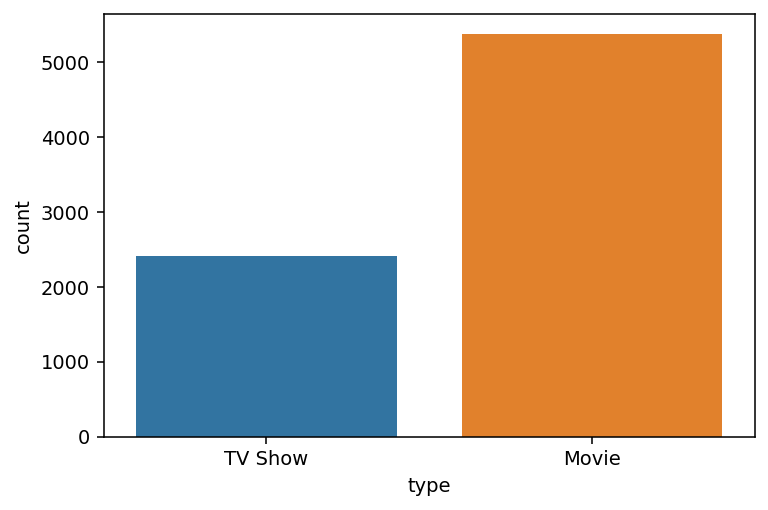

In [53]:
#Countplot to show the type

sns.countplot(x='type',data = dataset)

<AxesSubplot:xlabel='rating', ylabel='count'>

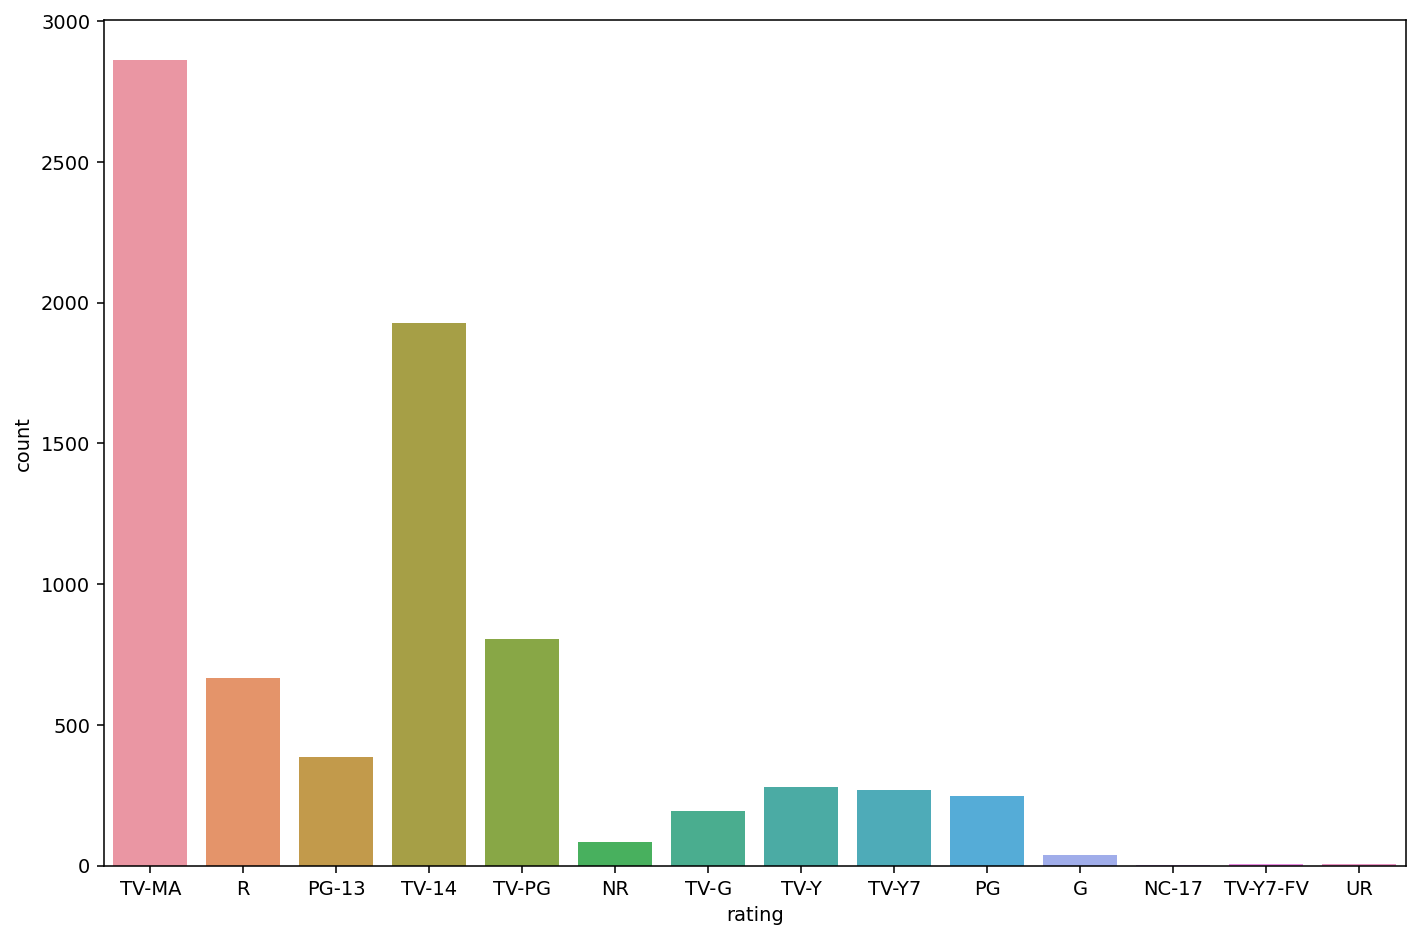

In [24]:
# To obtain the count of rating

plt.figure(figsize = (12,8))
sns.countplot(x='rating',data = dataset)

<AxesSubplot:xlabel='release_year', ylabel='count'>

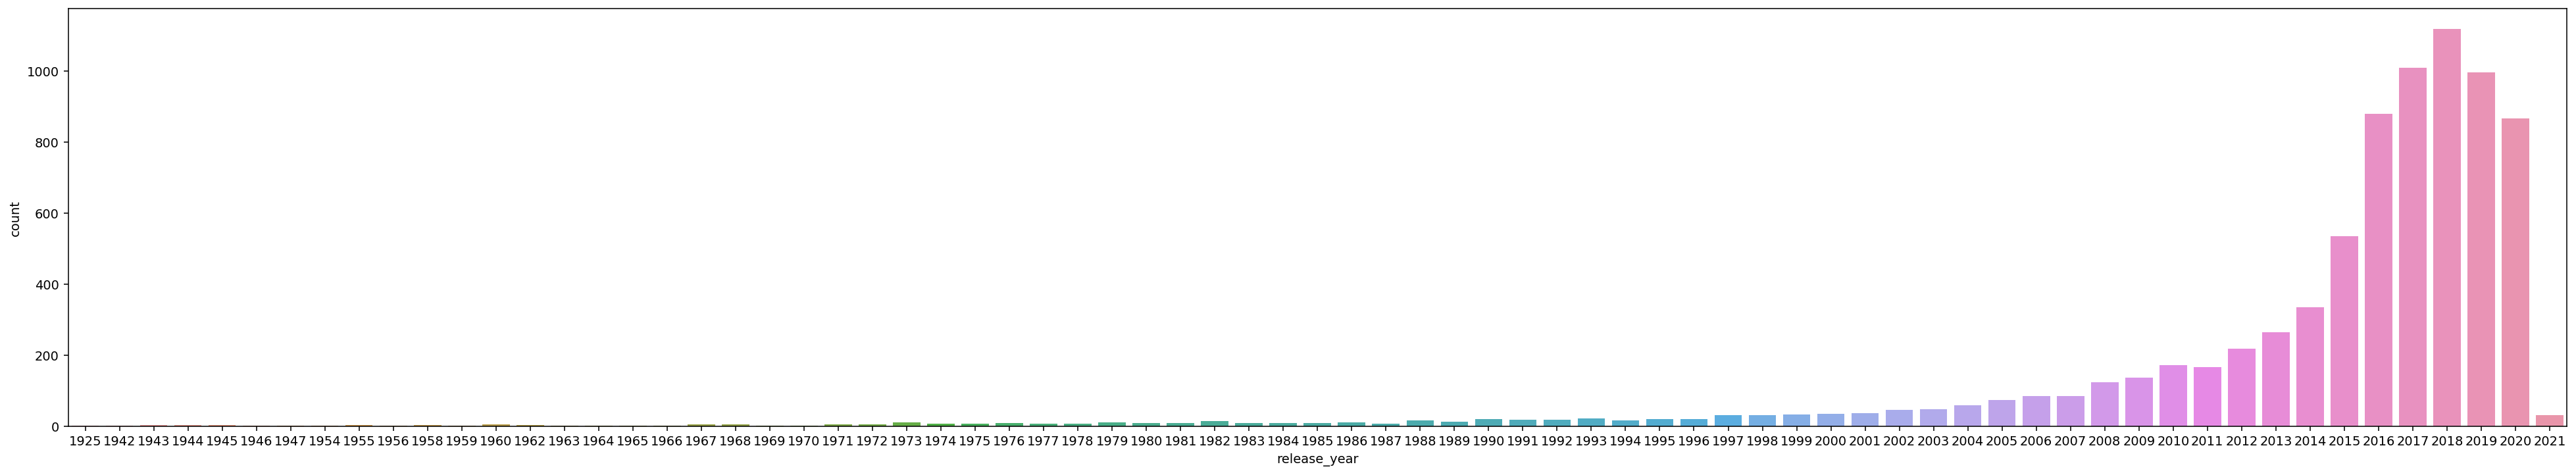

In [25]:
plt.figure(figsize = (35,6))
sns.countplot(x='release_year',data = dataset)

<AxesSubplot:xlabel='rating', ylabel='type'>

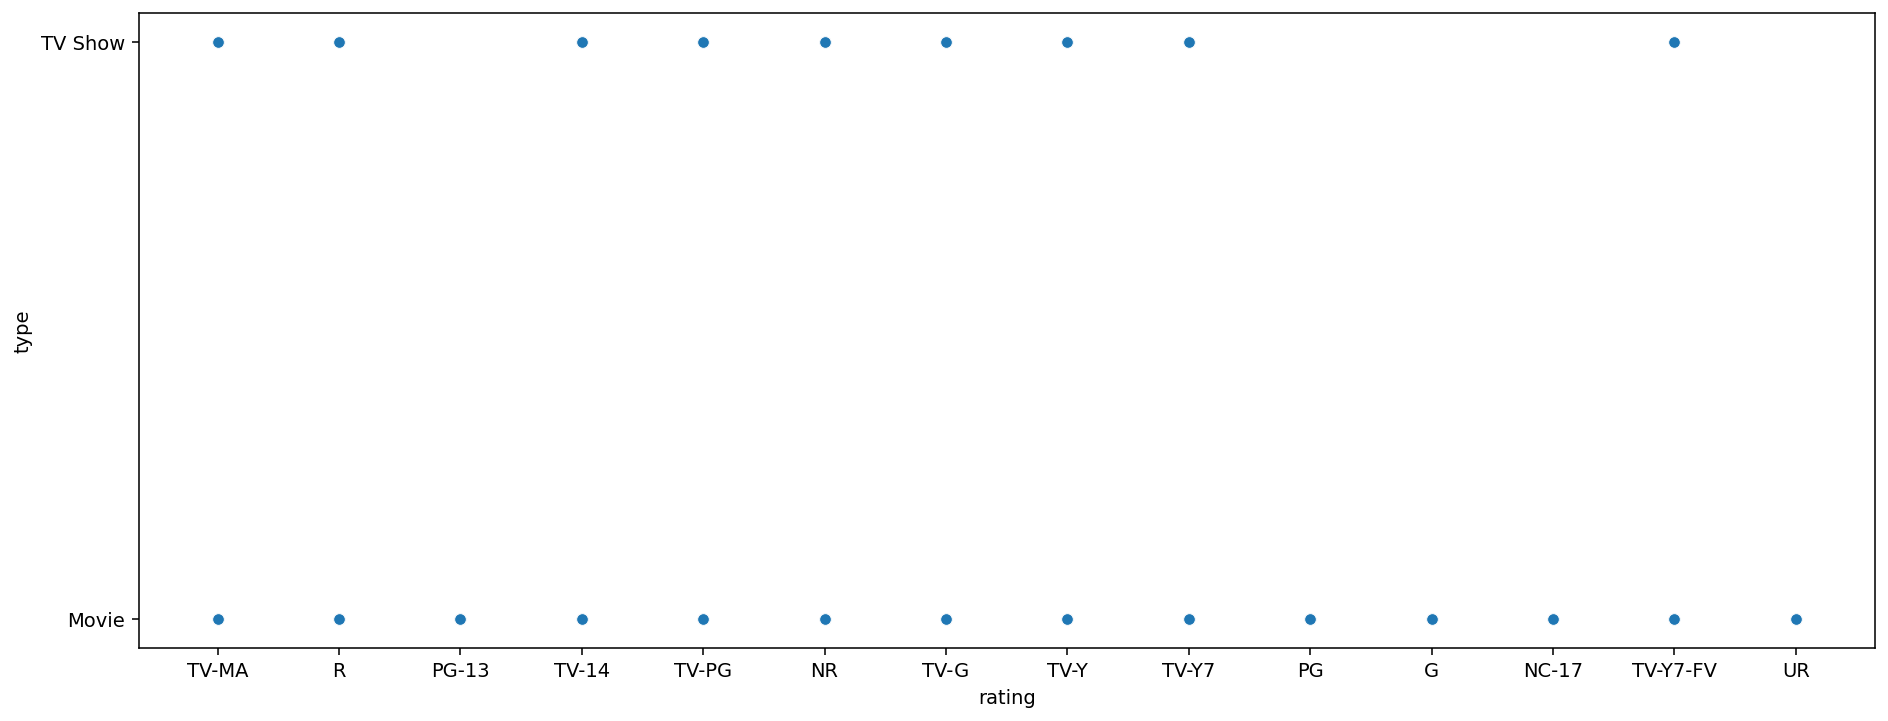

In [26]:
#Scatterplot

plt.figure(figsize=(16,6))
sns.scatterplot(x='rating',y='type',data = dataset) #analysing the type, whether its a movie or a movie v/s the rating it has

<AxesSubplot:xlabel='rating', ylabel='count'>

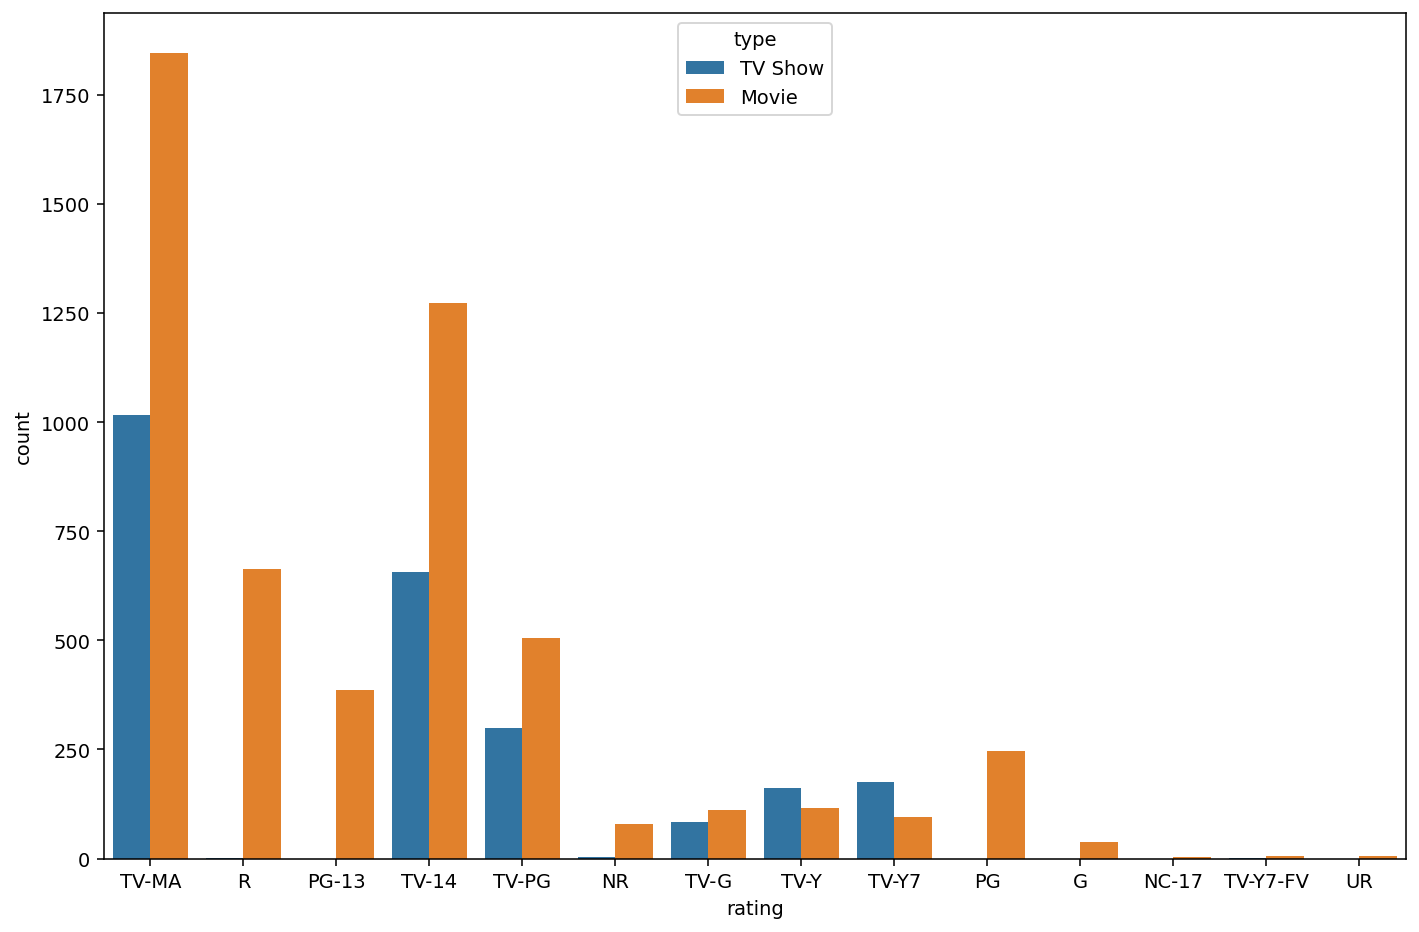

In [27]:
plt.figure(figsize = (12,8))
sns.countplot(x='rating',data = dataset,hue='type')

In [28]:
#Pie chart


import plotly.express as px #distribution according to countries
top_rated=dataset[0:10]
fig =px.sunburst(
    top_rated,
    path=['country'])
fig.show()

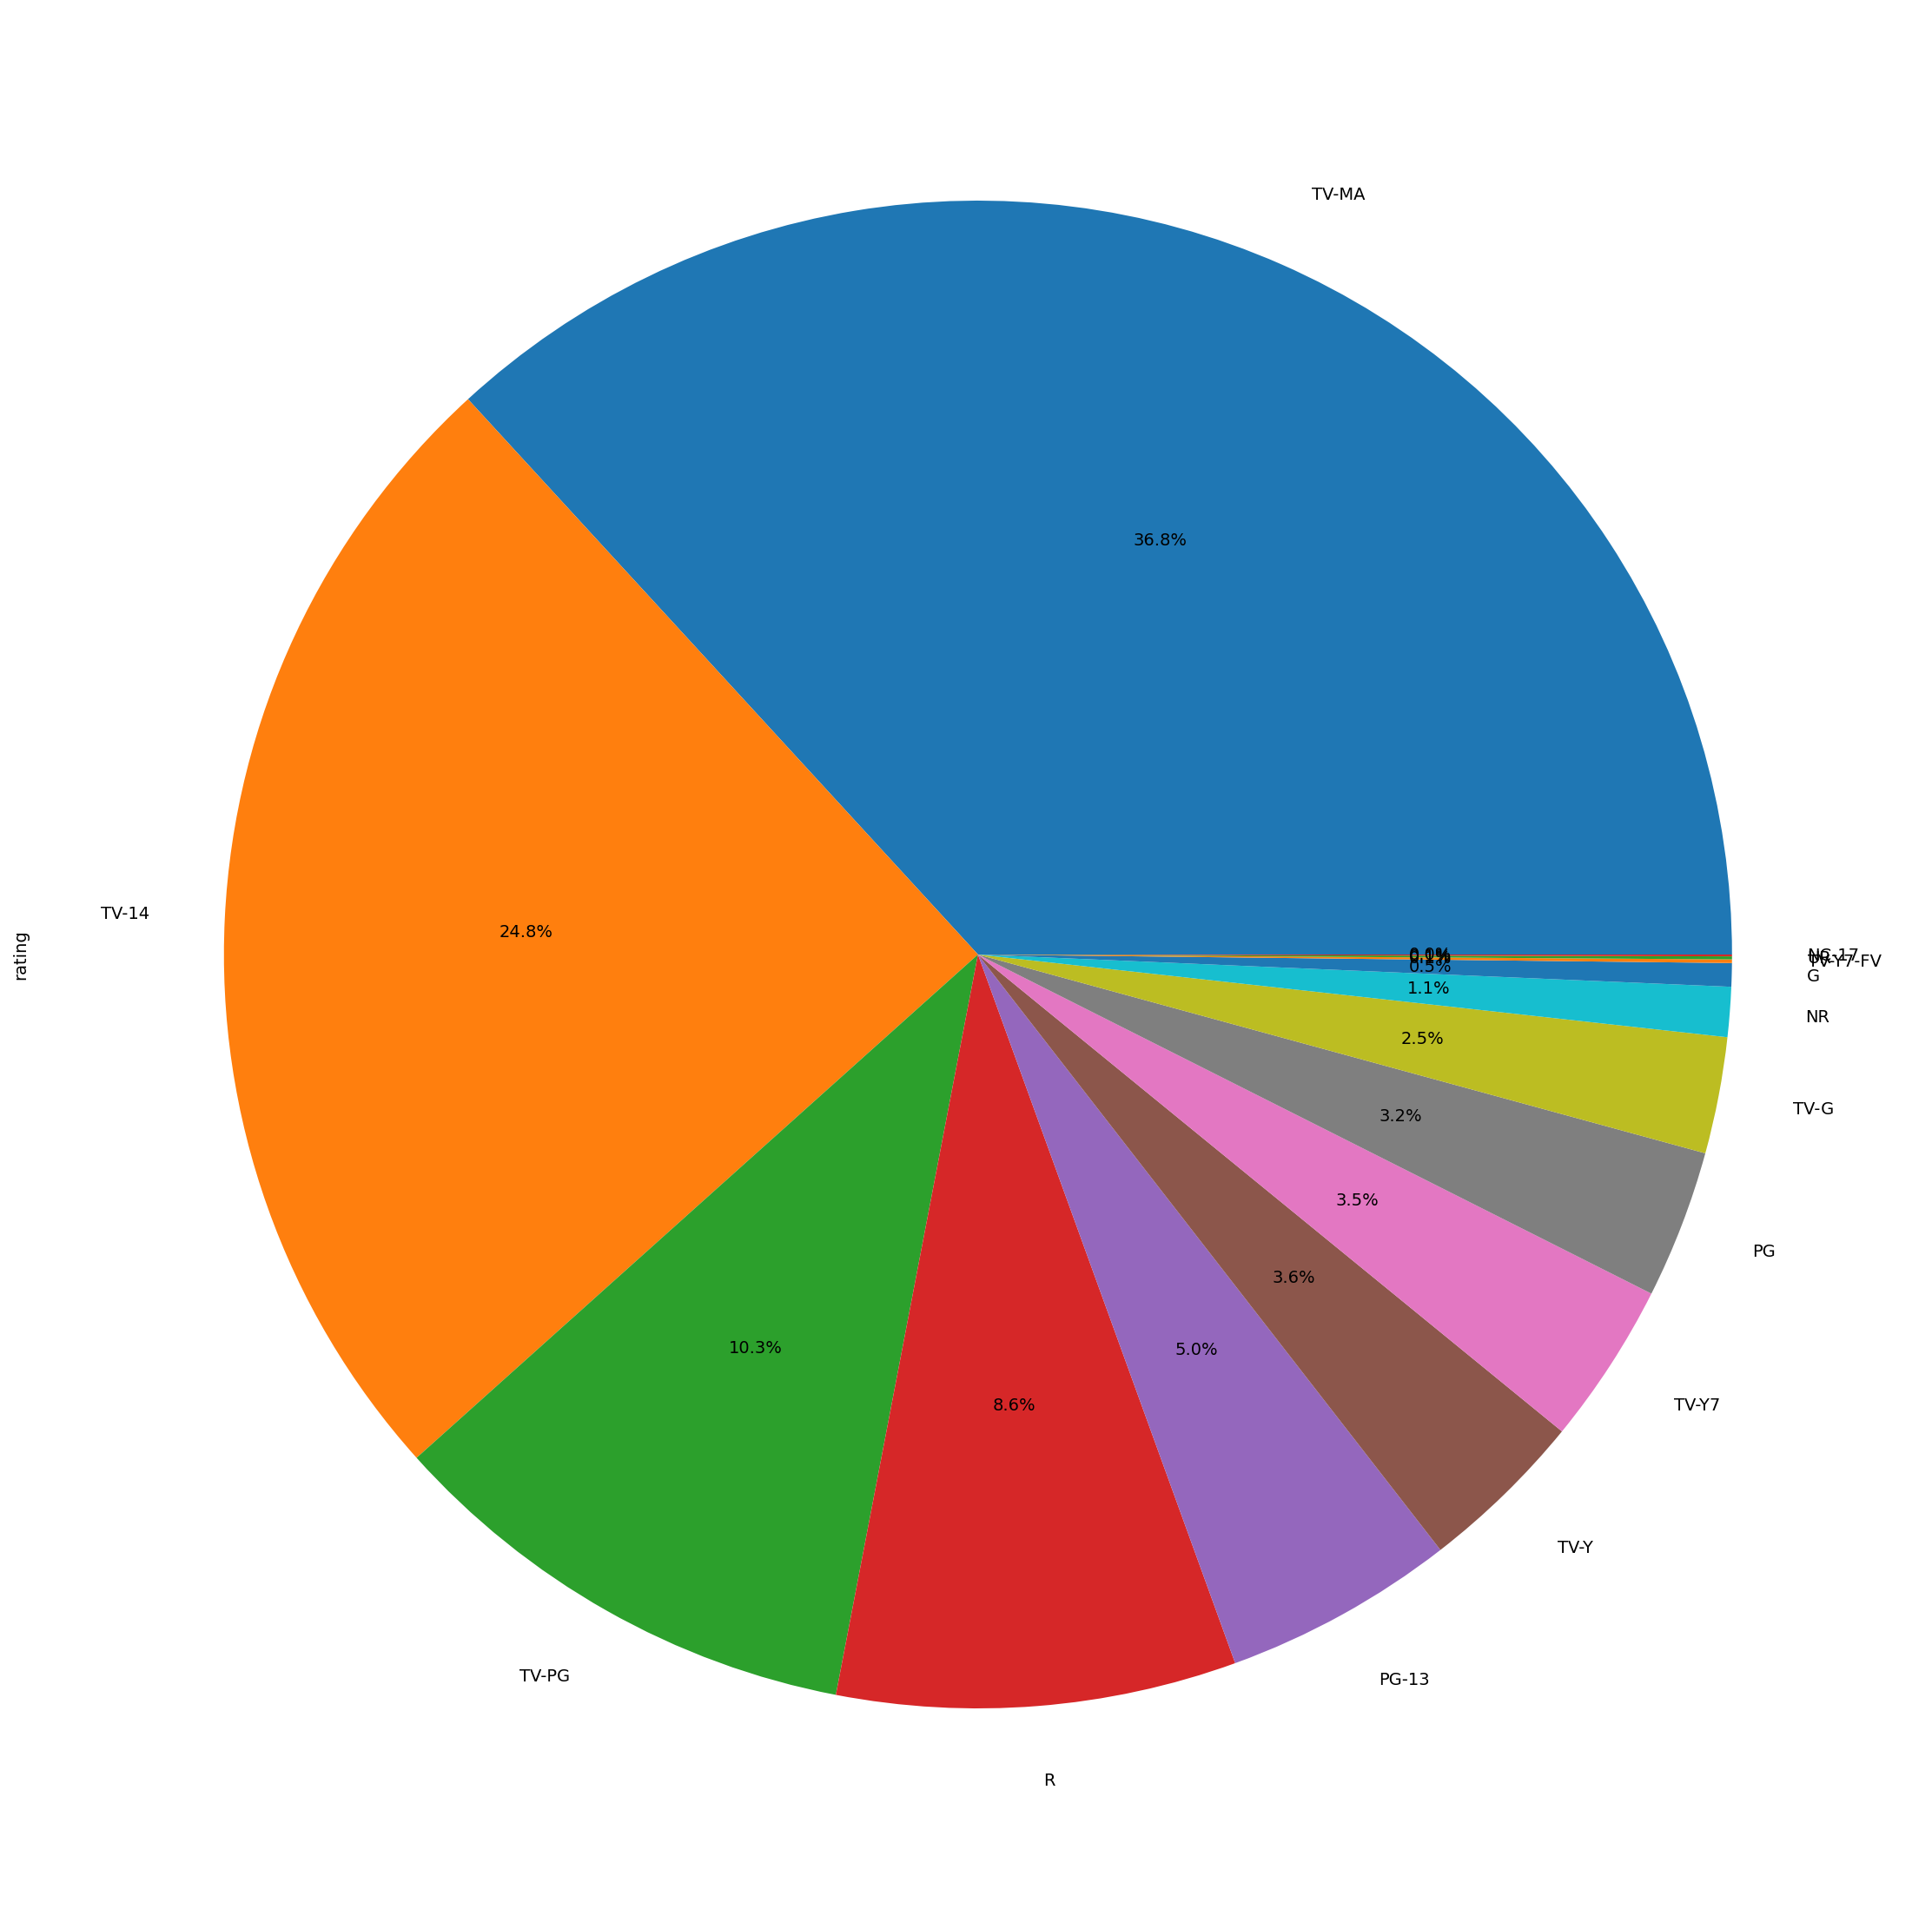

In [29]:
#Pie chart


dataset['rating'].value_counts().plot.pie(autopct='%1.1f%%',figsize=(20,35)) 
plt.show()

In [33]:
#To find the oldest movies that are available in Netflix
old_movies = dataset.sort_values("release_year", ascending = True) 
old_movies = old_movies[old_movies['duration'] != ""]
old_movies[['title', "release_year"]][:15]

,title,release_year
4867,Pioneers: First Women Filmmakers*,1925
6117,The Battle of Midway,1942
4960,Prelude to War,1942
7679,WWII: Report from the Aleutians,1943
7616,Why We Fight: The Battle of Russia,1943
7342,Undercover: How to Operate Behind Enemy Lines,1943
6657,The Memphis Belle: A Story of a\nFlying Fortress,1944
6699,The Negro Soldier,1944
7268,Tunisian Victory,1944
5371,San Pietro,1945


In [35]:
#Drama shows on Netflix
tag = "Dramas" 
dataset["relevant"] = dataset['listed_in'].fillna("").apply(lambda x : 1 if tag.lower() in x.lower() else 0)
com = dataset[dataset["relevant"] == 1]
com[com["country"] == "United States"][["title", "country","release_year"]].head(10)

,title,country,release_year
4,21,United States,2008
7,187,United States,1997
10,1922,United States,2017
16,9-Feb,United States,2018
46,1 Chance 2 Dance,United States,2014
47,1 Mile to You,United States,2017
60,12 ROUND GUN,United States,2017
63,13 Reasons Why,United States,2020
83,20th Century Women,United States,2016
94,28 Days,United States,2000


In [36]:
#Frequency of tv ratings
dataset['rating'].value_counts()

TV-MA       2861
TV-14       1928
TV-PG        804
R            665
PG-13        386
TV-Y         279
TV-Y7        270
PG           247
TV-G         194
NR            83
G             39
TV-Y7-FV       6
UR             5
NC-17          3
Name: rating, dtype: int64

In [37]:
#Countries with most releases for netflix

dataset_countries = pd.DataFrame(dataset.country.value_counts().reset_index().values, columns=["country", "count"])
dataset_countries.head()

,country,count
0,United States,3051
1,India,923
2,United Kingdom,396
3,Japan,224
4,South Korea,183


Text(0.5, 1.0, 'Top 10 Genres of Movies')

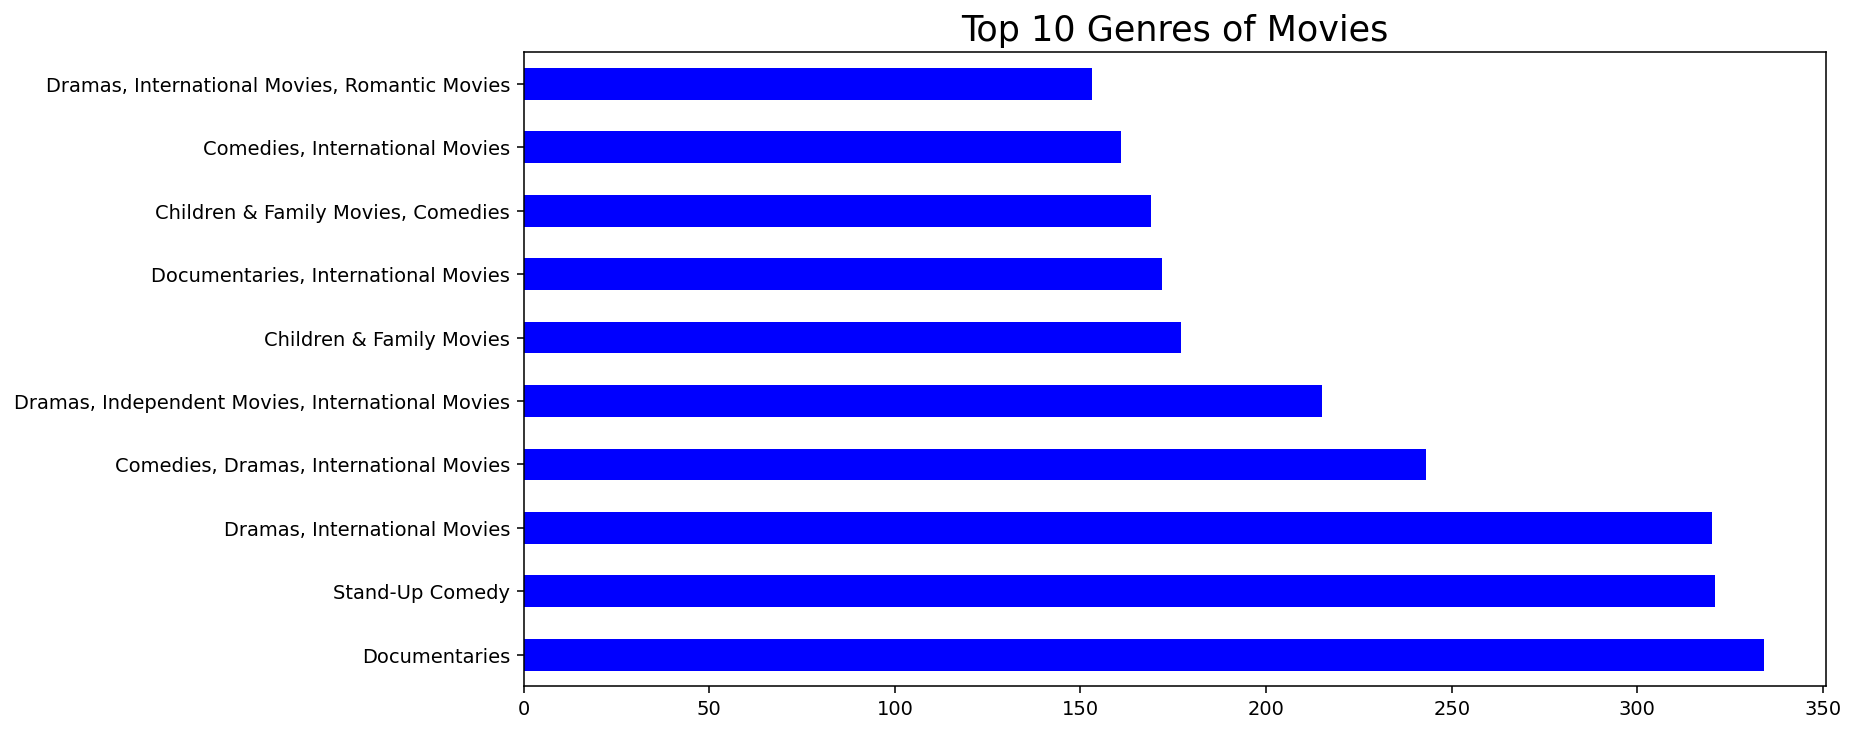

In [38]:
#To find the best genres of movies
plt.figure(figsize=(12,6))
dataset[dataset["type"]=="Movie"]["listed_in"].value_counts()[:10].plot(kind="barh",color="blue")
plt.title("Top 10 Genres of Movies",size=18)